# IRF2BP2 CHIPS

In [1]:
import os
from IPython.display import IFrame
import pandas as pd
import sys
sys.path.append('..')
from JKBio.epigenetics import ChIP_helper as chip
from JKBio import Helper as helper
import igv
import numpy as np
import pyBigWig
import itertools
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from bokeh.plotting import *
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
output_notebook()
%load_ext autoreload
%autoreload 2

Loading BokehJS ...

In [5]:
bfolder = '../data/recalib_bigwig_rep1/'
folder = '../data/diffBinding_rep1/diffPeaks/'

In [6]:
 ! ls -alh $folder

total 34M
drwxr-xr-x 2 jeremie jeremie 4.0K Jan 28 22:14 .
drwxr-xr-x 5 jeremie jeremie 4.0K Jan 31 18:22 ..
-rw-r--r-- 1 jeremie jeremie  32K Feb  1 16:42 MV411_IRF2BP2_DMSO_FLAG_IRF2BP2_R1_vs_MV411_IRF2BP2_VHL_FLAG_IRF2BP2_R1_c3.0_common.bed
-rw-r--r-- 1 jeremie jeremie 2.2M Feb  1 16:42 MV411_IRF2BP2_DMSO_FLAG_IRF2BP2_R1_vs_MV411_IRF2BP2_VHL_FLAG_IRF2BP2_R1_c3.0_cond1.bed
-rw-r--r-- 1 jeremie jeremie   90 Feb  1 16:42 MV411_IRF2BP2_DMSO_FLAG_IRF2BP2_R1_vs_MV411_IRF2BP2_VHL_FLAG_IRF2BP2_R1_c3.0_cond2.bed
-rw-r--r-- 1 jeremie jeremie  89K Feb  1 16:49 MV411_IRF2BP2_DMSO_MED1_R1_vs_MV411_IRF2BP2_VHL_MED1_R1_c3.0_common.bed
-rw-r--r-- 1 jeremie jeremie 285K Feb  1 16:49 MV411_IRF2BP2_DMSO_MED1_R1_vs_MV411_IRF2BP2_VHL_MED1_R1_c3.0_cond1.bed
-rw-r--r-- 1 jeremie jeremie   90 Feb  1 16:49 MV411_IRF2BP2_DMSO_MED1_R1_vs_MV411_IRF2BP2_VHL_MED1_R1_c3.0_cond2.bed
-rw-r--r-- 1 jeremie jeremie 5.4M Feb  1 16:57 MV411_IRF2BP2_DMSO_MYB_R1_vs_MV411_IRF2BP2_VHL_MYB_R1_c3.0_common.bed
-rw-r--r-- 1 jer

In [7]:
peaks = ! ls $folder

In [8]:
bigwig = ! ls $bfolder
num = 8

In [9]:
bigwig

['MV411_IRF2BP2_DMSO_FLAG_IRF2BP2_R1.bw',
 'MV411_IRF2BP2_DMSO_MED1_R1.bw',
 'MV411_IRF2BP2_DMSO_MYB_R1.bw',
 'MV411_IRF2BP2_DMSO_MYC_R1.bw',
 'MV411_IRF2BP2_DMSO_POLII_S2_R1.bw',
 'MV411_IRF2BP2_DMSO_POLII_S5_R1.bw',
 'MV411_IRF2BP2_DMSO_POLII_total_R1.bw',
 'MV411_IRF2BP2_DMSO_SPI1_R1.bw',
 'MV411_IRF2BP2_VHL_FLAG_IRF2BP2_R1.bw',
 'MV411_IRF2BP2_VHL_MED1_R1.bw',
 'MV411_IRF2BP2_VHL_MYB_R1.bw',
 'MV411_IRF2BP2_VHL_MYC_R1.bw',
 'MV411_IRF2BP2_VHL_POLII_S2_R1.bw',
 'MV411_IRF2BP2_VHL_POLII_S5_R1.bw',
 'MV411_IRF2BP2_VHL_POLII_total_R1.bw',
 'MV411_IRF2BP2_VHL_SPI1_R1.bw']

In [10]:
bigwig=[(bfolder+bigwig[i],bfolder+bigwig[i+num]) for i in range(num)]

In [11]:
bigwig

[('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_FLAG_IRF2BP2_R1.bw',
  '../data/recalib_bigwig_rep1/MV411_IRF2BP2_VHL_FLAG_IRF2BP2_R1.bw'),
 ('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_MED1_R1.bw',
  '../data/recalib_bigwig_rep1/MV411_IRF2BP2_VHL_MED1_R1.bw'),
 ('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_MYB_R1.bw',
  '../data/recalib_bigwig_rep1/MV411_IRF2BP2_VHL_MYB_R1.bw'),
 ('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_MYC_R1.bw',
  '../data/recalib_bigwig_rep1/MV411_IRF2BP2_VHL_MYC_R1.bw'),
 ('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_POLII_S2_R1.bw',
  '../data/recalib_bigwig_rep1/MV411_IRF2BP2_VHL_POLII_S2_R1.bw'),
 ('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_POLII_S5_R1.bw',
  '../data/recalib_bigwig_rep1/MV411_IRF2BP2_VHL_POLII_S5_R1.bw'),
 ('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_POLII_total_R1.bw',
  '../data/recalib_bigwig_rep1/MV411_IRF2BP2_VHL_POLII_total_R1.bw'),
 ('../data/recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_SPI1_R1.bw',
  '../data/re

In [12]:
peaks = [p for p in helper.grouped([folder+p for p in peaks],3)]

In [13]:
! mkdir temp

mkdir: cannot create directory ‘temp’: File exists


chrM -716 1284
chrM -716 1284
chrM 15196 17196
chrM -685 1315
chrUn_KI270466v1 -75 1925
chrUn_KI270466v1 -539 1461
chrUn_KI270336v1 -420 1580
chrUn_KI270333v1 1084 3084
chrUn_KI270333v1 -825 1175
chrM 15196 17196
chrM -685 1315
chrUn_KI270466v1 -75 1925
chrUn_KI270466v1 -539 1461
chrUn_KI270336v1 -420 1580
chrUn_KI270333v1 1084 3084
chrUn_KI270333v1 -825 1175
chrUn_KI270467v1 2257 4257
chrUn_KI270466v1 25 2025
chrUn_KI270438v1 111137 113137
chrM -733 1267
chrM 15071 17071
chrUn_KI270467v1 2257 4257
chrUn_KI270466v1 25 2025
chrUn_KI270438v1 111137 113137
chrM -733 1267
chrM 15071 17071
chrUn_KI270466v1 45 2045
chrUn_KI270467v1 2127 4127
chrUn_KI270466v1 45 2045
chrUn_KI270467v1 2127 4127


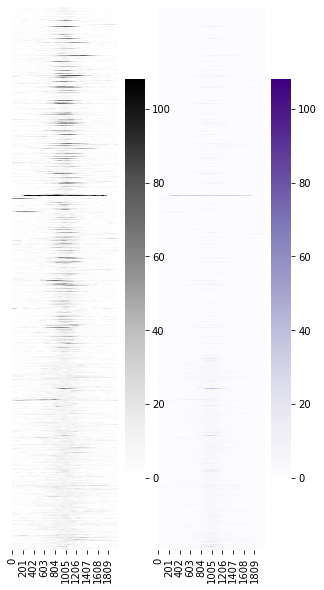

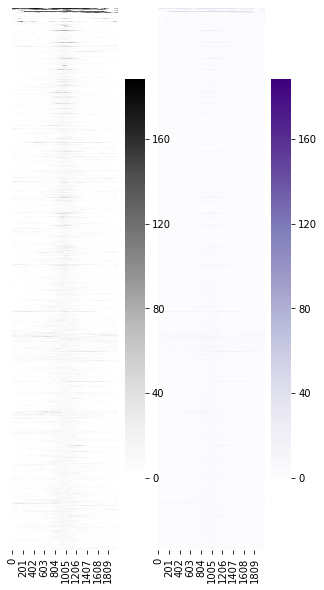

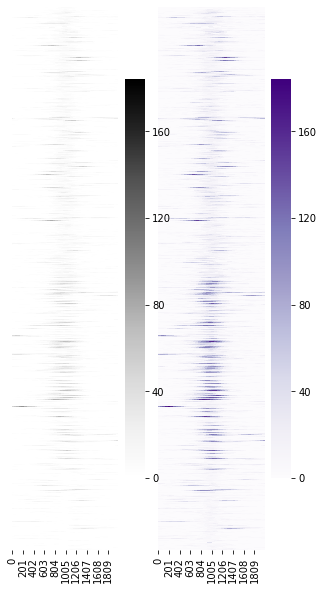

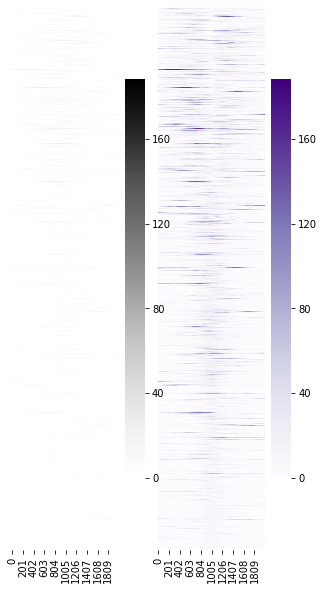

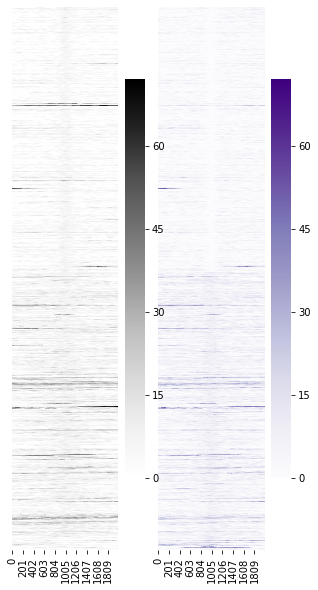

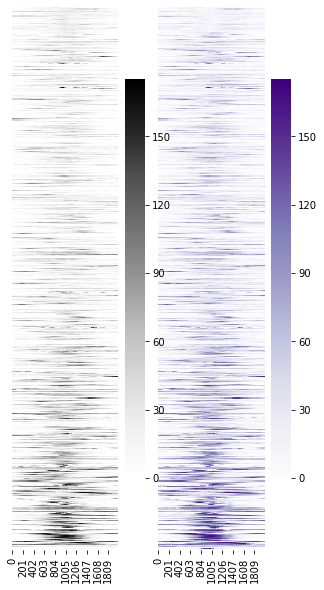

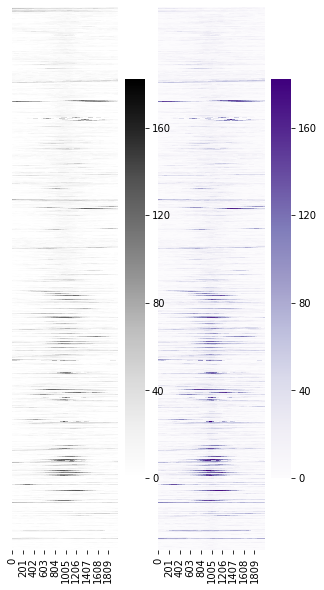

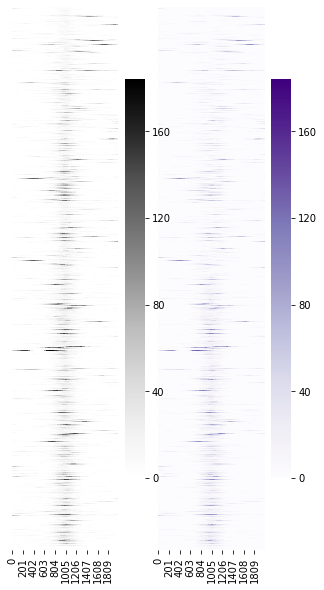

In [15]:
cov = {}
fig = {}
for i,peak in enumerate(peaks):
    p = pd.read_csv(peak[1],sep='\t',skiprows=1,header=None,
            names=['chrom','start','end','name','foldchange']).sort_values(by='foldchange',ascending=False).iloc[:500]
    p2 =pd.read_csv(peak[0],sep='\t',skiprows=1,header=None,
            names=['chrom','start','end','name','foldchange']).iloc[:500]
    p = p.append(p2)
    p2 =pd.read_csv(peak[2],sep='\t',skiprows=1,header=None,
            names=['chrom','start','end','name','foldchange']).sort_values(by='foldchange',ascending=True).iloc[-500:]
    p = p.append(p2)
    
    cov.update(chip.computePeaksAt(p,bigwig[i], window=1000, numpeaks=1500, numthreads=8,
                   width=5, length=10, name='temp/peaksat'+str(i)+'.png', sort=False)[0])

In [134]:
for k,i in cov.items():
    print(k, i.max())

../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_FLAG_IRF2BP2_R1.bw 173
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_FLAG_IRF2BP2_R1.bw 73
../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_MED1_R1.bw 144
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_MED1_R1.bw 30
../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_MYB_R1.bw 108
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_MYB_R1.bw 198
../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_MYC_R1.bw 29
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_MYC_R1.bw 188
../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_POLII_S2_R1.bw 146
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_POLII_S2_R1.bw 130
../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_POLII_S5_R1.bw 175
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_POLII_S5_R1.bw 166
../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_POLII_total_R1.bw 133
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_POLII_total_R1.bw 180
../recalib_bigwig_rep1/MV411_IRF2BP2_DMSO_SPI1_R1.bw 193
../recalib_bigwig_rep1/MV411_IRF2BP2_VHL_SPI1_R1.bw 148


In [50]:
pd.read_csv(peak[1],sep='\t')

,"track name=""condition 1 (peaks)"" description=""unique regions in condition 1"" visibility=1"
